# Introduction

This notebook implements the [VotingClassifier](#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html), in which multiple:
* predictions are gathered and the plurality vote wins
* probabilities are gathered and aggregated to produce an ensembled set of probabilities


## Summary
* 

In [19]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from scipy import stats
from joblib import dump
from joblib import load
import xgboost as xgb
import matplotlib.pyplot as plt
from typing import Dict
from kaggle.api.kaggle_api_extended import KaggleApi
from dotenv import find_dotenv, load_dotenv
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin

from src.data.make_dataset import load_sets, save_sets, save_predictions, make_adversarial_validation_dataset, load_estimators
from src.models.null import NullModel
from src.visualization.visualize import classification_reports, classification_reports_2
from src.visualization.visualize import plot_pie, create_feature_importance_df, plot_feature_importances


In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
load_dotenv(find_dotenv())
api = KaggleApi()
api.authenticate()

In [11]:
competition = os.environ['COMPETITION']

# Set up directories

In [12]:
project_dir = Path.cwd().parent.parent
data_dir = project_dir / 'data'
raw_data_dir = data_dir / 'raw'
interim_data_dir = data_dir / 'interim'
processed_data_dir = data_dir / 'processed'
models_dir = project_dir / 'models'

# Load data

In [13]:
X_train, X_val, y_train, y_val, X_test = load_sets(interim_data_dir)
X_train_lim, X_val_lim, y_train_lim, y_val_lim, X_test_lim = load_sets(interim_data_dir, suffix='top_8_features')
test_id = pd.read_csv(interim_data_dir / 'test_id.csv')

In [14]:
target = 'TARGET_5Yrs'

# Baseline

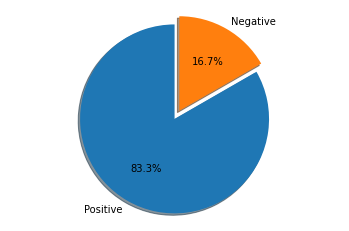

In [16]:
plot_pie(y_train)

# Load predictions

In [28]:
estimator_list = load_estimators(models_dir)

Loading 10906675_xgb_es_spw.joblib
Loading 10906675_xgb_es_spw_1_comp.joblib
Loading 10906675_xgb_es_spw_cal.joblib
Loading exploratory_xgb.joblib
Loading randomised_xgb.joblib
Loading xgb_top_8_features_early_stopping.joblib
Loading brackenrig_mark_12964298_week1_votingclassifier.sav
Loading brackenrig_mark_12964298_week2_SMOTE.sav


In [34]:
estimator_list.pop(1)

('10906675_xgb_es_spw_cal',
 CalibratedClassifierCV(base_estimator=Pipeline(steps=[('scaler',
                                                        StandardScaler()),
                                                       ('pca',
                                                        PCA(n_components=8)),
                                                       ('classifier',
                                                        XGBClassifier(base_score=0.5,
                                                                      booster='gbtree',
                                                                      colsample_bylevel=1,
                                                                      colsample_bynode=1,
                                                                      colsample_bytree=0.590700201239684,
                                                                      eval_metric='logloss',
                                                                  

In [ ]:
clf = VotingClassifier(estimators=estimator_list,
                       voting='hard',
                       n_jobs=-1,
                       verbose=True)

clf.fit(X_train.head(100), y_train.head(100))

In [ ]:
classification_reports(clf, X_train, y_train)

In [ ]:
classification_reports(clf, X_val, y_val)